In [136]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [137]:
df_train= pd.read_csv(r"./Train.csv")
df_test= pd.read_csv(r"./Test.csv")

In [138]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [139]:
#df_test

In [140]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [141]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [142]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [143]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [144]:
# item_weight is numerical column so we fill it with Mean Imputation

In [145]:
df_train["Item_Weight"].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [146]:
df_train["Item_Weight"].fillna(df_train["Item_Weight"].mean(),inplace=True)
df_test["Item_Weight"].fillna(df_test["Item_Weight"].mean(),inplace=True)

C:\Users\a0079421\AppData\Local\Temp\ipykernel_17572\473319555.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\a0079421\AppData\Local\Temp\ipykernel_17572\473319555.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [147]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [148]:
df_train['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [149]:
## Outlet_Size is Catagorical column so we fill it with Mode imputation

In [150]:
df_train['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [151]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

C:\Users\a0079421\AppData\Local\Temp\ipykernel_17572\4104325985.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\a0079421\AppData\Local\Temp\ipykernel_17572\4104325985.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [152]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [153]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [154]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [155]:
##Selecting features based on general requirements

In [156]:
df_train.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
df_test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)


In [157]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [158]:
pip install dtale


Note: you may need to restart the kernel to use updated packages.


In [159]:
import dtale

In [160]:
dtale.show(df_train)

In [161]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


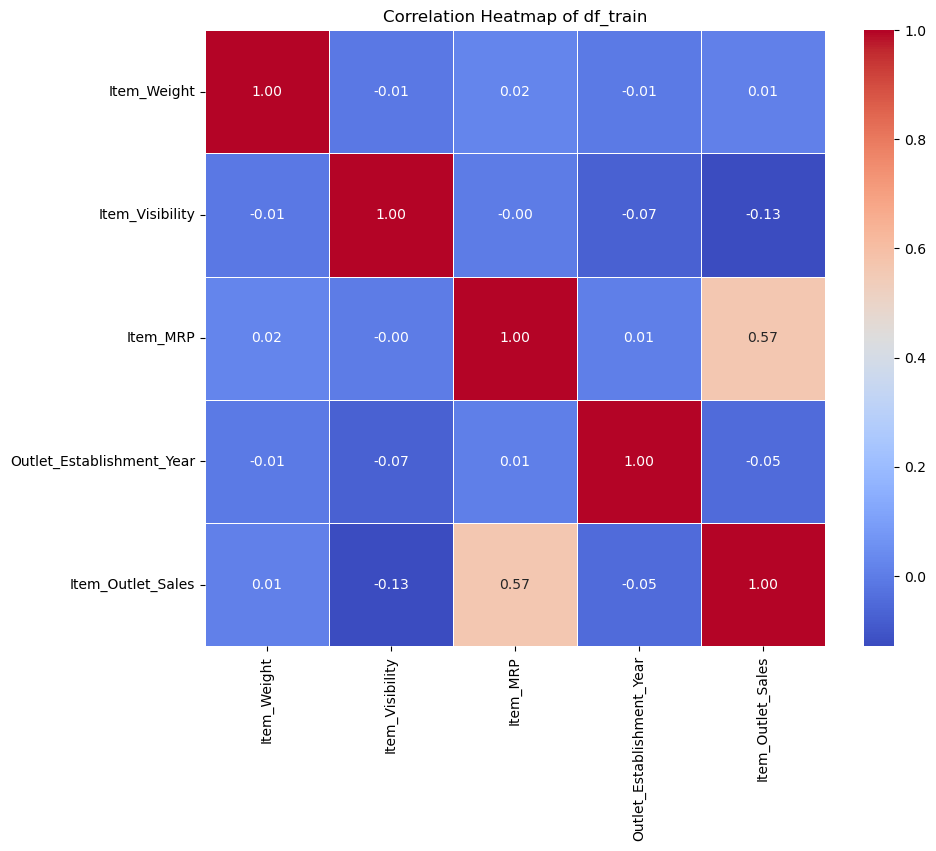

In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_train is your DataFrame (replace with your actual df_train)
# For example, df_train = pd.read_csv('your_data.csv')

# Step 1: Select only numeric columns from the DataFrame
df_numeric = df_train.select_dtypes(include=['number'])

# Step 2: Calculate the correlation matrix for numeric columns
correlation_matrix = df_numeric.corr()

# Step 3: Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Step 4: Add a title and show the plot
plt.title("Correlation Heatmap of df_train")
plt.show()


EDA USING Klib Library

In [163]:
pip install klib


Note: you may need to restart the kernel to use updated packages.


In [164]:
import klib

In [165]:
import klib


C:\Users\a0079421\AppData\Local\Temp\ipykernel_17572\1403615097.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\a0079421\AppData\Local\Temp\ipykernel_17572\1403615097.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\a0079421\AppData\Local\Temp\ipykernel_17572\1403615097.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\a0079421\AppData\Local\Temp\ipykernel_17572\1403615097.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False`

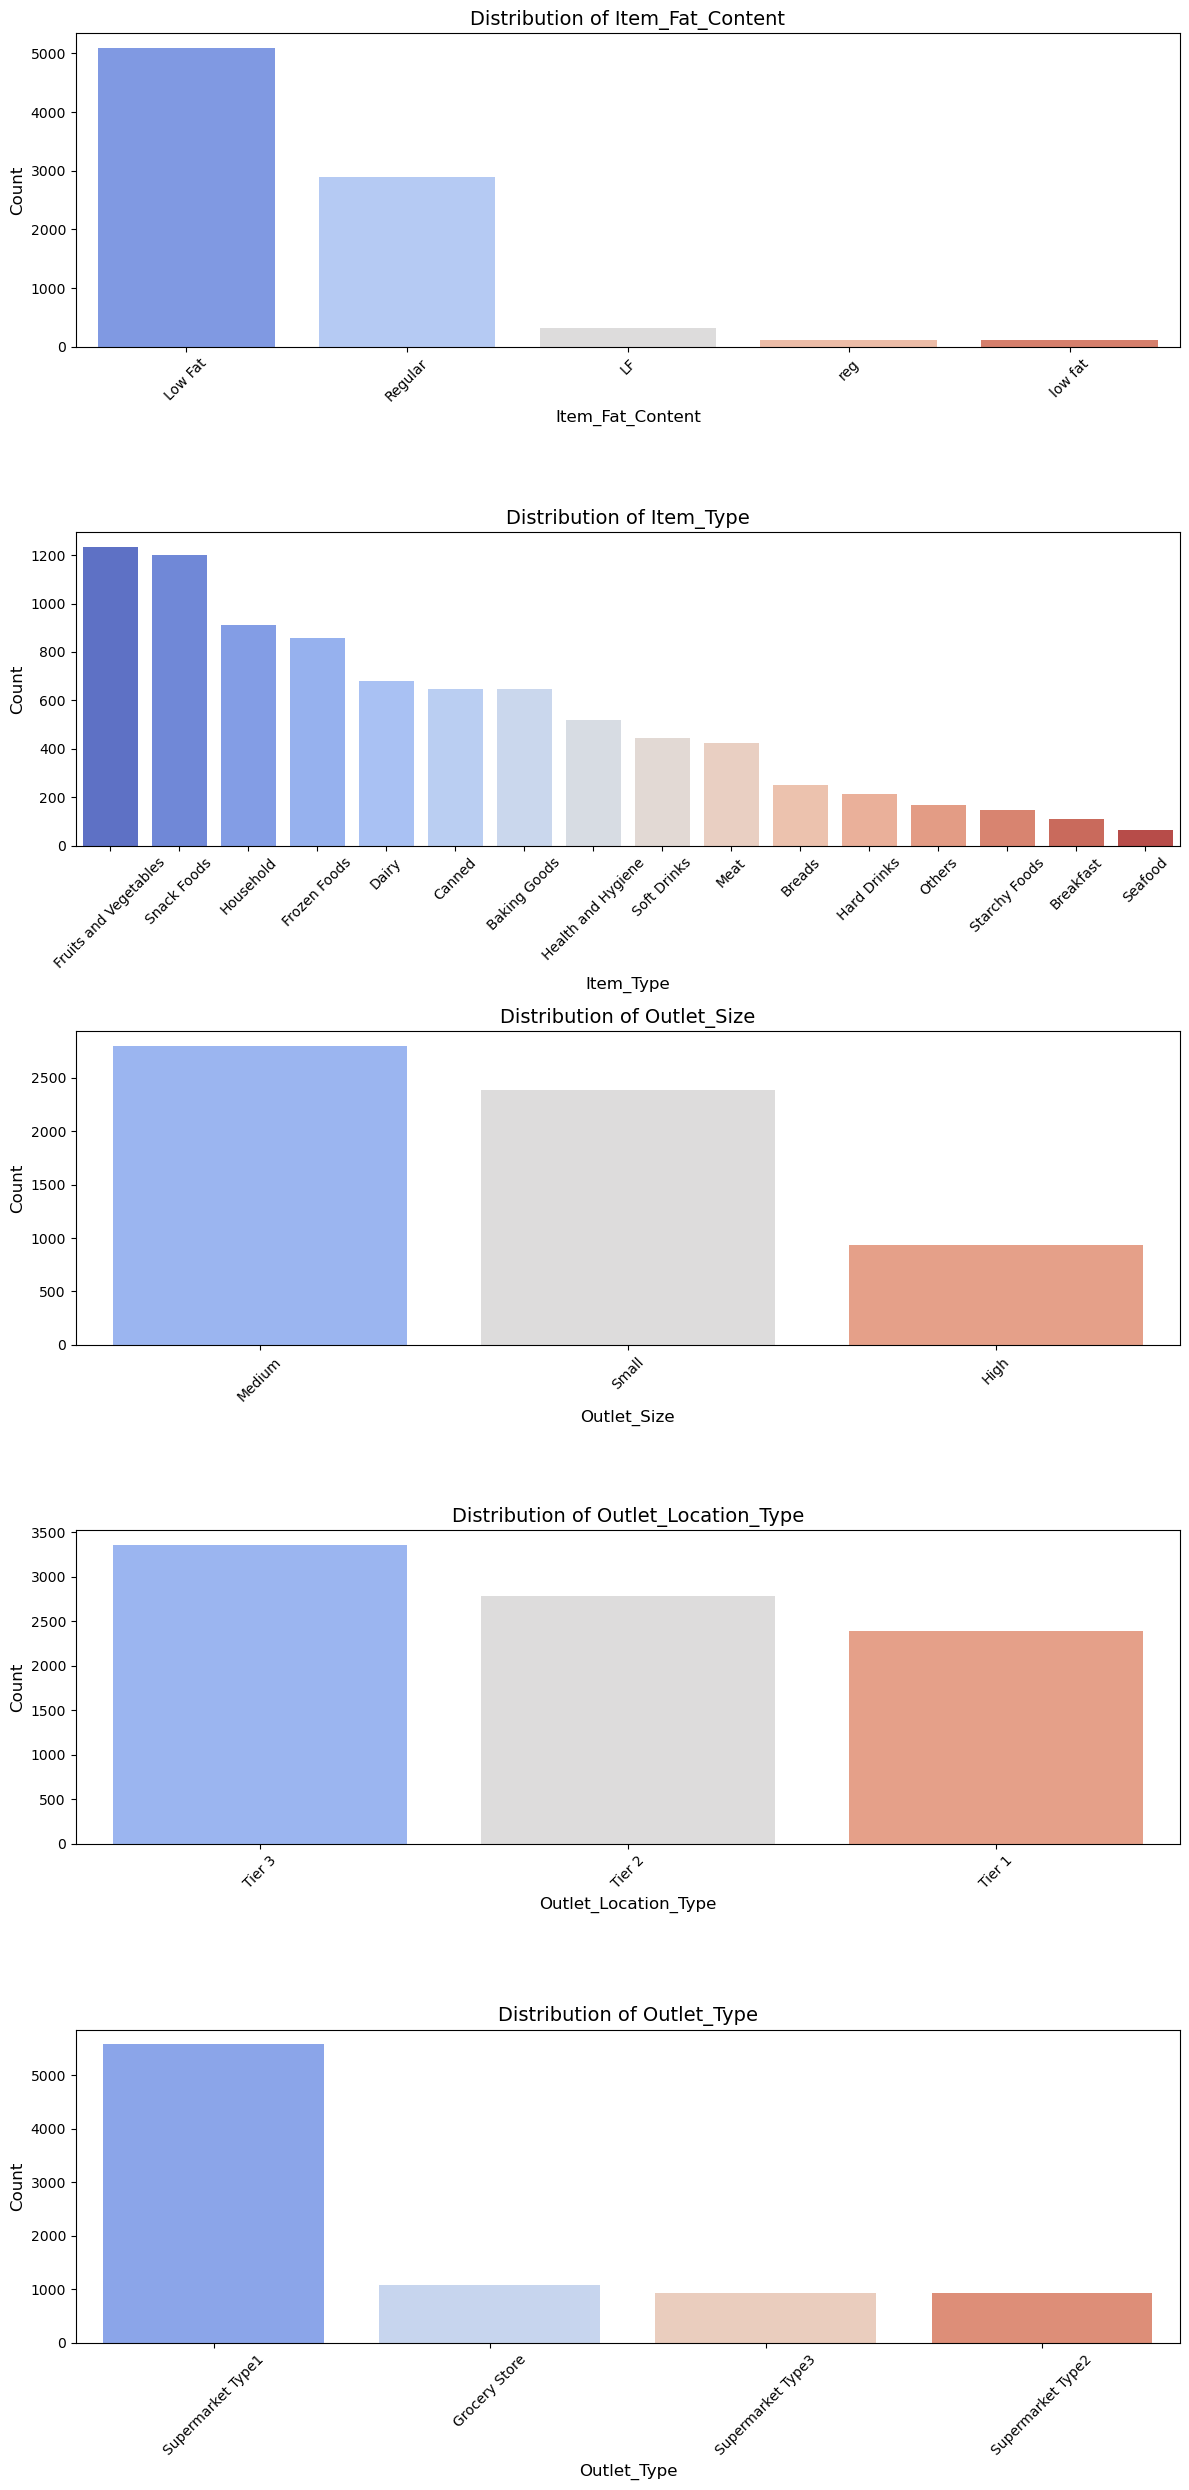

In [166]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot categorical distributions
def cat_plot(df):
    """Plots the distribution of categorical features in a dataframe."""
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    if len(categorical_cols) == 0:
        print("No categorical columns found in the dataset.")
        return

    num_plots = len(categorical_cols)
    fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(12, 5 * num_plots))

    if num_plots == 1:
        axes = [axes]  # Ensure axes is iterable

    for ax, col in zip(axes, categorical_cols):
        sns.countplot(x=df[col], ax=ax, palette="coolwarm", order=df[col].value_counts().index)
        ax.set_title(f'Distribution of {col}', fontsize=14)
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel('Count', fontsize=12)
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Load dataset (replace this with actual dataset)
df_train = df_train= pd.read_csv(r"./Train.csv") # Replace with your dataset path
df_train.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
# Call the function to display categorical plots
cat_plot(df_train)


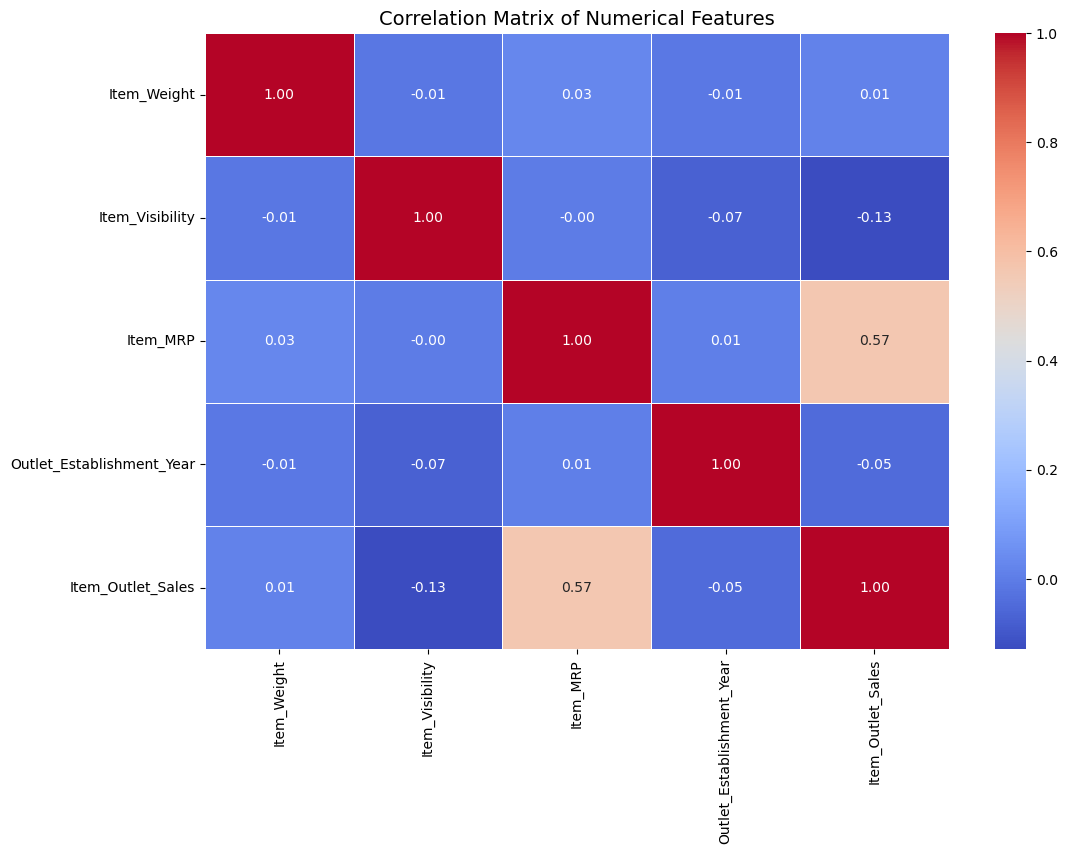

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (Replace with actual dataset)
df_train = pd.read_csv("Train.csv")  # Ensure the correct file path

# Drop categorical columns since correlation works with numeric features only
df_numeric = df_train.select_dtypes(include=['number'])

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Title
plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.show()


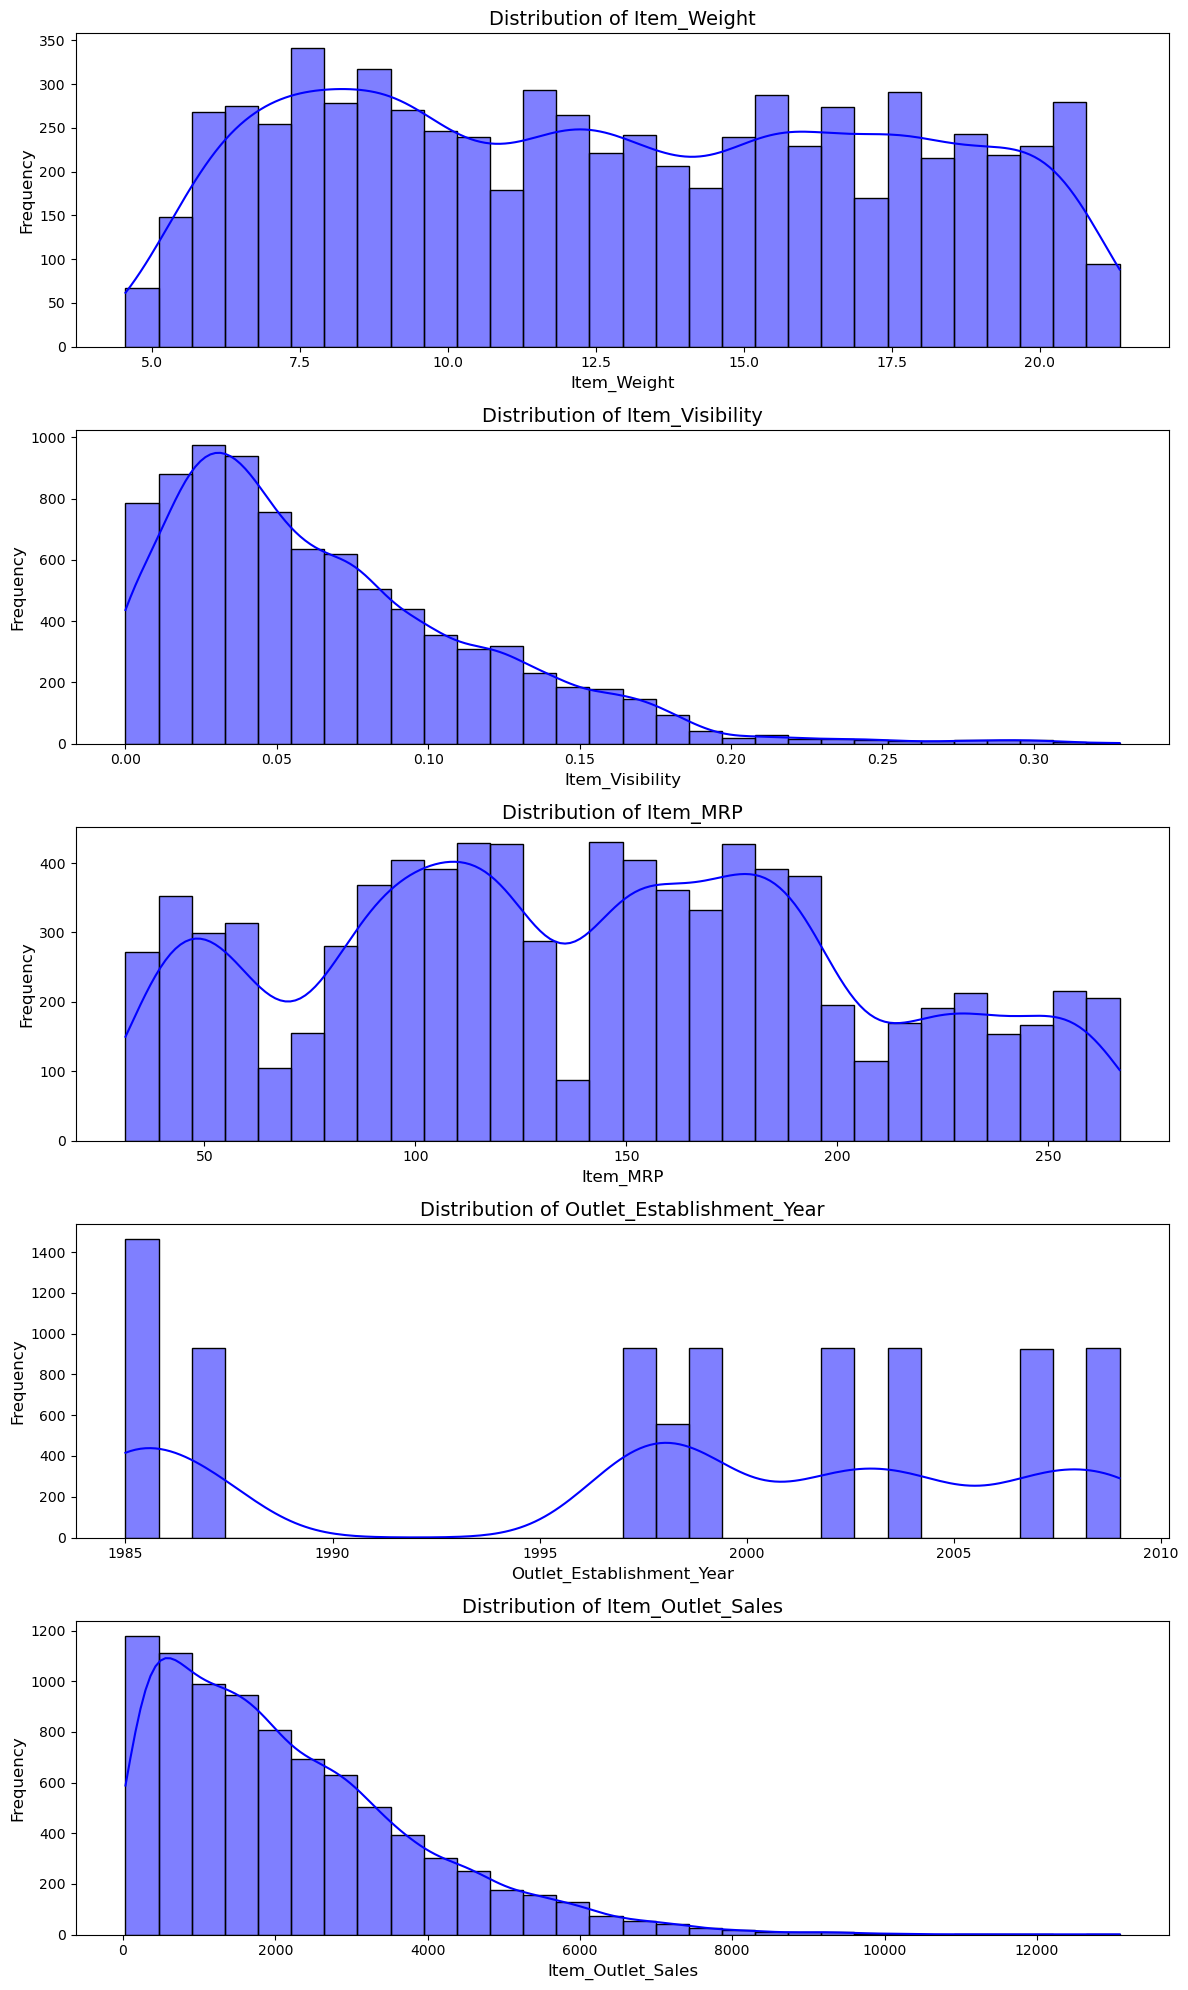

In [168]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File path
file_path = "Train.csv"

# Check if file exists
if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found. Please check the path.")
else:
    # Load dataset
    df_train = pd.read_csv(file_path)

    # Drop 'Item_Identifier' and 'Outlet_Identifier'
    df_train = df_train.drop(columns=['Item_Identifier', 'Outlet_Identifier'], errors='ignore')

    # Function to plot distribution of numerical features
    def dist_plot(df):
        """Plots the distribution of numerical features in a dataframe."""
        numerical_cols = df.select_dtypes(include=['number']).columns

        if len(numerical_cols) == 0:
            print("No numerical columns found in the dataset.")
            return

        num_plots = len(numerical_cols)
        fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(12, 4 * num_plots))

        if num_plots == 1:
            axes = [axes]  # Ensure axes is iterable

        for ax, col in zip(axes, numerical_cols):
            sns.histplot(df[col], kde=True, bins=30, color="blue", ax=ax)
            ax.set_title(f'Distribution of {col}', fontsize=14)
            ax.set_xlabel(col, fontsize=12)
            ax.set_ylabel('Frequency', fontsize=12)

        plt.tight_layout()
        plt.show()

    # Call the function to display numerical distribution plots
    dist_plot(df_train)


C:\Users\a0079421\AppData\Local\Temp\ipykernel_17572\3056371633.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




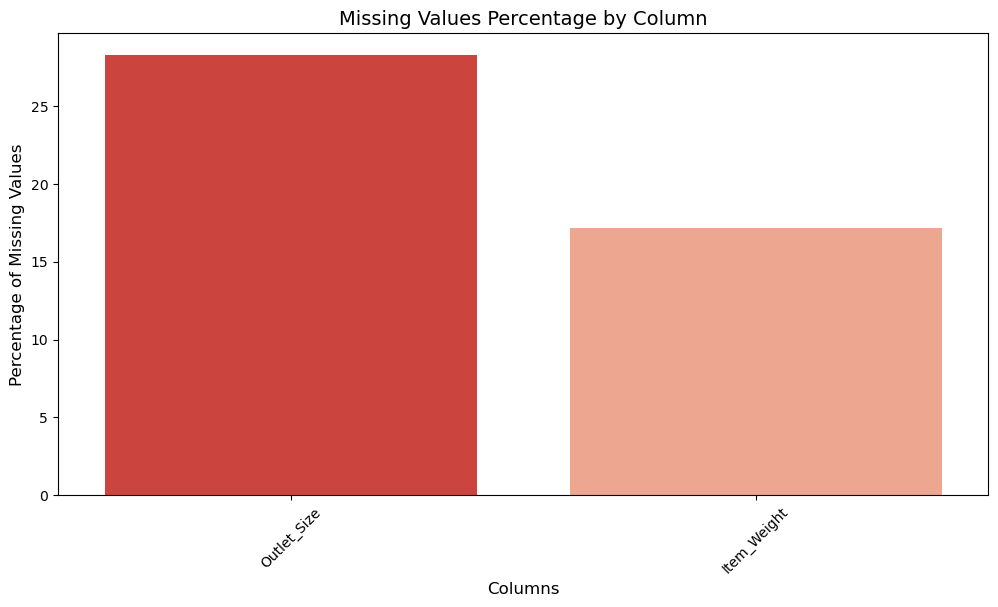

In [169]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File path
file_path = "Train.csv"  # Update this path if necessary

# Check if file exists before loading
if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found. Please check the path.")
else:
    # Load dataset
    df_train = pd.read_csv(file_path)

    # Function to plot missing values
    def missing_value_plot(df):
        """Plots the percentage of missing values for each column in a dataframe."""
        missing_data = df.isnull().mean() * 100  # Calculate missing values percentage
        missing_data = missing_data[missing_data > 0].sort_values(ascending=False)  # Filter only missing values

        if missing_data.empty:
            print("No missing values found in the dataset.")
            return

        plt.figure(figsize=(12, 6))
        sns.barplot(x=missing_data.index, y=missing_data.values, palette="Reds_r")
        plt.xticks(rotation=45)
        plt.xlabel("Columns", fontsize=12)
        plt.ylabel("Percentage of Missing Values", fontsize=12)
        plt.title("Missing Values Percentage by Column", fontsize=14)
        plt.show()

    # Call the function to display missing values plot
    missing_value_plot(df_train)


In [170]:
# DATA CLEANING

In [171]:
df_train = df_train.drop(columns=['Item_Identifier', 'Outlet_Identifier'])


In [172]:
klib.data_cleaning(df_train)

Shape of cleaned data: (8523, 10) - Remaining NAs: 3873


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.46 MB (-70.77%)



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,NaN,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,NaN,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


In [173]:
klib.clean_column_names(df_train)

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [174]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_weight                7060 non-null   float64
 1   item_fat_content           8523 non-null   object 
 2   item_visibility            8523 non-null   float64
 3   item_type                  8523 non-null   object 
 4   item_mrp                   8523 non-null   float64
 5   outlet_establishment_year  8523 non-null   int64  
 6   outlet_size                6113 non-null   object 
 7   outlet_location_type       8523 non-null   object 
 8   outlet_type                8523 non-null   object 
 9   item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [175]:
df_train=klib.convert_datatypes(df_train)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_weight                7060 non-null   float32 
 1   item_fat_content           8523 non-null   category
 2   item_visibility            8523 non-null   float32 
 3   item_type                  8523 non-null   category
 4   item_mrp                   8523 non-null   float32 
 5   outlet_establishment_year  8523 non-null   int16   
 6   outlet_size                6113 non-null   category
 7   outlet_location_type       8523 non-null   category
 8   outlet_type                8523 non-null   category
 9   item_outlet_sales          8523 non-null   float32 
dtypes: category(5), float32(4), int16(1)
memory usage: 192.9 KB


In [176]:
klib.mv_col_handling(df_train)

c:\Users\a0079421\Music\conda\Lib\site-packages\klib\clean.py:443: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

c:\Users\a0079421\Music\conda\Lib\site-packages\klib\clean.py:449: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

c:\Users\a0079421\Music\conda\Lib\site-packages\klib\clean.py:449: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,Regular,0.000000,Fruits and Vegetables,182.095001,1998,NaN,Tier 3,Grocery Store,732.380005
4,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...
8518,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,Regular,0.046982,Baking Goods,108.156998,2002,NaN,Tier 2,Supermarket Type1,549.284973
8520,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


In [177]:
klib.pool_duplicate_subsets(df_train)

,item_visibility,item_mrp,item_outlet_sales,pooled_vars
0,0.016047,249.809204,3735.137939,0
1,0.019278,48.269199,443.422791,1
2,0.016760,141.617996,2097.270020,2
3,0.000000,182.095001,732.380005,3
4,0.000000,53.861401,994.705200,4
...,...,...,...,...
8518,0.056783,214.521805,2778.383301,8518
8519,0.046982,108.156998,549.284973,8519
8520,0.035186,85.122398,1193.113647,8520
8521,0.145221,103.133202,1845.597656,8521


In [178]:
df_train

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,NaN,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,NaN,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


PREPROCESSING TASK BEFORE MODEL BUILDING

In [179]:
## 1)label encoder

In [180]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [181]:
df_train= df_train.apply(le.fit_transform)

In [182]:
df_train

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,284,1,664,4,5592,4,1,0,1,2540
1,57,2,880,14,473,8,1,2,2,422
2,375,1,715,10,2901,4,1,0,1,1639
3,392,2,0,6,4227,3,3,2,0,670
4,265,1,0,9,627,1,0,2,1,865
...,...,...,...,...,...,...,...,...,...,...
8518,125,1,3912,13,4955,1,0,2,1,2047
8519,233,2,3278,0,2023,5,3,1,1,516
8520,299,1,2302,8,1263,6,2,1,1,1018
8521,149,2,7174,13,1857,8,1,2,2,1466


SPLITTING OUR DATA INTO TRAIN AND TEST

In [ ]:
X=df_train.drop("item_outlet_sales",axis=1)

In [ ]:
Y=df_train["item_outlet_sales"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

In [ ]:
X_train

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
3684,393,1,6031,4,647,1,0,2,1
1935,182,1,4178,14,1564,7,3,1,1
5142,394,2,4417,10,3740,7,3,1,1
4978,86,0,2018,4,4065,2,2,0,1
2299,367,1,1151,4,2124,5,3,1,1
...,...,...,...,...,...,...,...,...,...
599,10,1,3048,14,4454,2,2,0,1
5695,343,1,7532,7,707,5,3,1,1
8006,321,1,845,8,1632,2,2,0,1
1361,290,2,6833,0,5169,7,3,1,1


In [ ]:
X_train

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
3684,393,1,6031,4,647,1,0,2,1
1935,182,1,4178,14,1564,7,3,1,1
5142,394,2,4417,10,3740,7,3,1,1
4978,86,0,2018,4,4065,2,2,0,1
2299,367,1,1151,4,2124,5,3,1,1
...,...,...,...,...,...,...,...,...,...
599,10,1,3048,14,4454,2,2,0,1
5695,343,1,7532,7,707,5,3,1,1
8006,321,1,845,8,1632,2,2,0,1
1361,290,2,6833,0,5169,7,3,1,1


STANDARIZATION

In [ ]:
X.describe()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,313.635105,1.369354,3708.866127,7.226681,2941.096562,3.790684,1.736360,1.112871,1.201220
std,104.998618,0.644810,2396.221439,4.209990,1675.483234,2.730322,0.989181,0.812757,0.796459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,285.000000,1.000000,1595.500000,4.000000,1535.500000,1.000000,1.000000,0.000000,1.000000
50%,341.000000,1.000000,3708.000000,6.000000,2949.000000,4.000000,2.000000,1.000000,1.000000
75%,395.000000,2.000000,5788.500000,10.000000,4351.500000,6.000000,3.000000,2.000000,1.000000
max,415.000000,4.000000,7878.000000,15.000000,5937.000000,8.000000,3.000000,2.000000,3.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [ ]:
X_train_std= sc.fit_transform(X_train)

In [ ]:
X_train_std

array([[ 0.7555614 , -0.57382672,  0.9652137 , ..., -1.7570342 ,
         1.08786619, -0.25964107],
       [-1.26736955, -0.57382672,  0.19203621, ...,  1.28755895,
        -0.13870429, -0.25964107],
       [ 0.76514875,  0.97378032,  0.29176067, ...,  1.28755895,
        -0.13870429, -0.25964107],
       ...,
       [ 0.06527217, -0.57382672, -1.19868187, ...,  0.27269457,
        -1.36527477, -0.25964107],
       [-0.2319357 ,  0.97378032,  1.29985393, ...,  1.28755895,
        -0.13870429, -0.25964107],
       [ 0.41041679, -0.57382672,  1.53977679, ..., -0.74216982,
         1.08786619,  0.98524841]])

2025-03-13 12:37:10,784 - INFO     - Executing shutdown due to inactivity...
2025-03-13 12:37:10,813 - INFO     - Executing shutdown...
2025-03-13 12:37:10,815 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [ ]:
X_test_std= sc.fit_transform(X_test)

In [ ]:
X_test_std

array([[-0.0595213 , -0.56892467,  0.05920654, ..., -0.75373281,
         1.1067281 ,  1.07886076],
       [ 0.63703643, -0.56892467, -0.42707836, ..., -1.74994556,
         1.1067281 , -0.22387125],
       [-1.12757649,  0.99561817,  0.50454992, ...,  0.24247994,
        -1.38596862, -0.22387125],
       ...,
       [ 0.41413796, -0.56892467,  1.10488618, ...,  1.23869268,
         1.1067281 , -1.52660325],
       [ 0.5534495 , -0.56892467, -1.53458804, ..., -0.75373281,
         1.1067281 ,  1.07886076],
       [-2.16776936,  0.99561817, -1.45562941, ...,  1.23869268,
        -0.13962026, -0.22387125]])

In [ ]:
Y_train

3684     144
1935    1311
5142    1242
4978    1426
2299    2462
        ... 
599     3137
5695    1193
8006    1684
1361    2001
1547     746
Name: item_outlet_sales, Length: 6818, dtype: int64

In [ ]:
Y_test

8179     801
8355    2056
3411    1529
7089     779
6954    1858
        ... 
1317    1386
4996     808
531      356
3891    1144
6629    1839
Name: item_outlet_sales, Length: 1705, dtype: int64

MODEL BUILDING

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [ ]:
Y_pred_lr=lr.predict(X_test_std)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [187]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.5299236810735857
497.197832079588
623.9212588433917


In [188]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()

In [189]:
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [191]:
Y_pred_rf=rf.predict(X_test)

In [192]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.6117609897016835
431.3216070381232
567.0158284606583


2025-03-13 14:37:07,337 - INFO     - Executing shutdown due to inactivity...
2025-03-13 14:37:07,357 - INFO     - Executing shutdown...
2025-03-13 14:37:07,360 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


HYPER PARAMETER TUNING

In [195]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto","sqrt","log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

#define grid search
grid= dict(n_estimators=n_estimators)

#cv= RepeatedStratifiedKFold(n_splits=5, n_repeats=3 ,random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,scoring="r2",error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

#summarize results
print(f"Best:{grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means= grid_search_forest.cv_results_['mean_test_score']
stds=grid_search_forest.cv_results_['std_test_score']
params=grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:3f}({stdev:.3f}) with:{param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best:0.622 using {'n_estimators': 1000}
0.585607(0.005) with:{'n_estimators': 10}
0.620082(0.001) with:{'n_estimators': 100}
0.621984(0.003) with:{'n_estimators': 1000}


In [196]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [197]:
grid_search_forest.best_score_

0.6219841034625899